## Data source
The dataset you will use resides at the following URL:

In [3]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"


## Understand the data

### `FuelConsumption.csv`:
Let's download and use a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODEL YEAR** e.g. 2014
- **MAKE** e.g. VOLVO
- **MODEL** e.g. S60 AWD
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 3.0
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. AS6
- **FUEL TYPE** e.g. Z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 13.2
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 9.5
- **FUEL CONSUMPTION COMBINED (L/100 km)** e.g. 11.5
- **FUEL CONSUMPTION COMBINED MPG (MPG)** e.g. 25
- **CO2 EMISSIONS (g/km)** e.g. 182 

My task will be to create a multiple linear regression model using some of these features to predict CO2 emissions of unobserved cars based on the selected features. 


<p><strong style="font-size:20px;">Let's import basics machine Learning modules</strong></p>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<p><strong style="font-size:20px;">Let's load the data in a dataframe</strong></p>

In [17]:
df = pd.read_csv(url)

In [19]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<p><strong style="font-size:20px;">Let's fecth all the information about the dataframe df</strong></p>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


<p style="font-size:17px;">-->We can see that the dataframe is already clean, and there is no null values.<br>    Let's now explore the relationships(correlations) between columns</p>

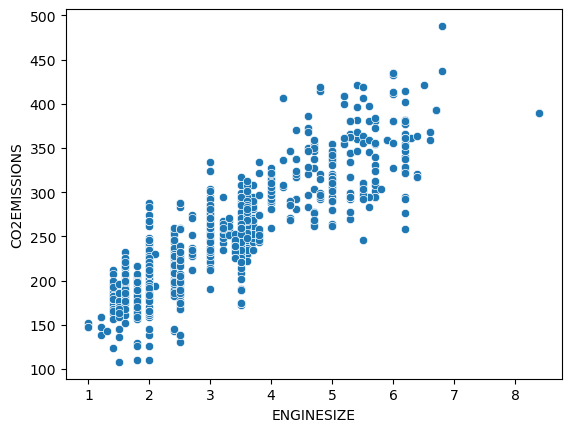

In [39]:
sns.scatterplot(df, x='ENGINESIZE', y='CO2EMISSIONS');

<Axes: xlabel='FUELTYPE', ylabel='CO2EMISSIONS'>

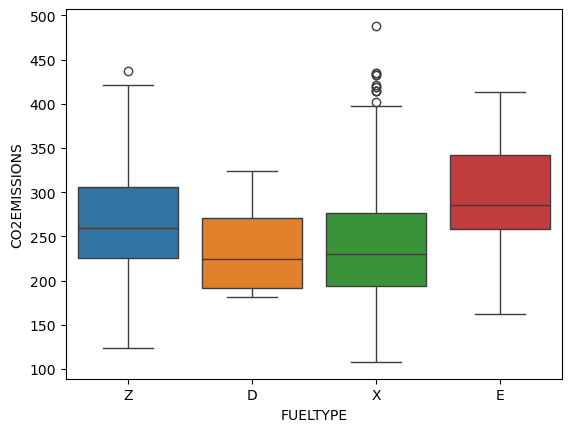

In [44]:
sns.boxplot(df, x='FUELTYPE', y='CO2EMISSIONS', hue='FUELTYPE')

In [50]:
df['TRANSMISSION'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

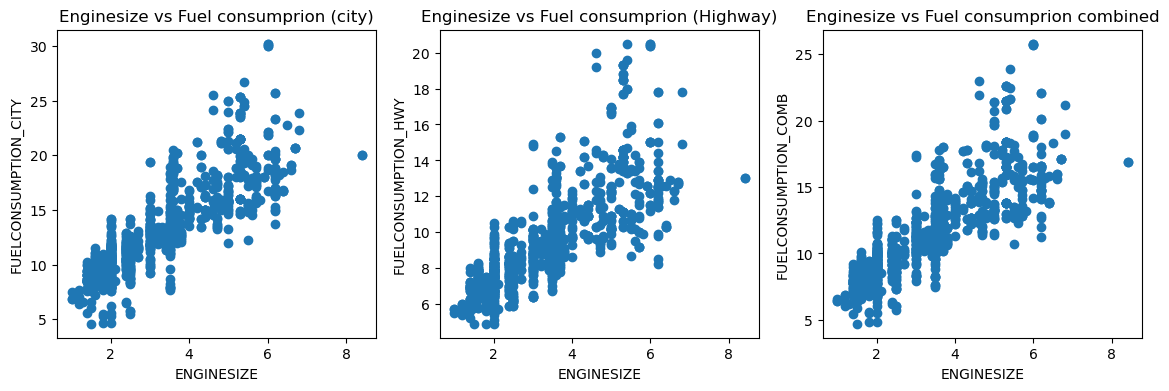

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(14,4));

axes[0].scatter('ENGINESIZE', 'FUELCONSUMPTION_CITY', data=df);
axes[0].set_title('Enginesize vs Fuel consumprion (city)')
axes[0].set_xlabel('ENGINESIZE')
axes[0].set_ylabel('FUELCONSUMPTION_CITY')

axes[1].scatter('ENGINESIZE', 'FUELCONSUMPTION_HWY', data=df);
axes[1].set_title('Enginesize vs Fuel consumprion (Highway)')
axes[1].set_xlabel('ENGINESIZE')
axes[1].set_ylabel('FUELCONSUMPTION_HWY')

axes[2].scatter('ENGINESIZE', 'FUELCONSUMPTION_COMB', data=df);
axes[2].set_title('Enginesize vs Fuel consumprion combined')
axes[2].set_xlabel('ENGINESIZE')
axes[2].set_ylabel('FUELCONSUMPTION_COMB');

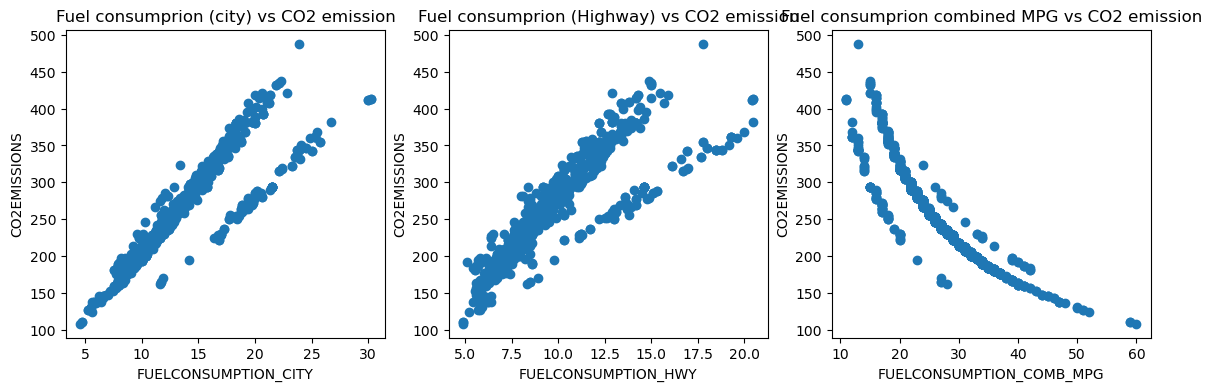

In [192]:
fig, axes = plt.subplots(1, 3, figsize=(14,4));

axes[0].scatter('FUELCONSUMPTION_CITY', 'CO2EMISSIONS', data=df);
axes[0].set_title('Fuel consumprion (city) vs CO2 emission')
axes[0].set_ylabel('CO2EMISSIONS',)
axes[0].set_xlabel('FUELCONSUMPTION_CITY')

axes[1].scatter('FUELCONSUMPTION_HWY', 'CO2EMISSIONS', data=df);
axes[1].set_title('Fuel consumprion (Highway) vs CO2 emission')
axes[1].set_ylabel('CO2EMISSIONS')
axes[1].set_xlabel('FUELCONSUMPTION_HWY')

axes[2].scatter('FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS', data=df);
axes[2].set_title('Fuel consumprion combined MPG vs CO2 emission')
axes[2].set_ylabel('CO2EMISSIONS')
axes[2].set_xlabel('FUELCONSUMPTION_COMB_MPG');

In [102]:
df.corr(numeric_only=True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [119]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [129]:
#df['TRANSMISSION'].unique()

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [131]:
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]

In [146]:
X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27


In [112]:
y = df['CO2EMISSIONS']

In [150]:
scaler = StandardScaler()

In [117]:
model = LinearRegression()

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [154]:
scaler.fit(X_train)

StandardScaler()

In [156]:
X_train_scaled = scaler.transform(X_train)

In [162]:
X_test_scaled = scaler.transform(X_test)

In [164]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [166]:
y_pred = model.predict(X_test_scaled)

In [172]:
MSE = mean_squared_error(y_test, y_pred)

In [176]:
RMSE = np.sqrt(MSE)

In [178]:
RMSE

19.37889192768454

In [182]:
print(y.min(), y.max())

108 488


In [186]:
R2_score = r2_score(y_test, y_pred)

In [188]:
R2_score

0.9064221756687783